In [1]:
import sys
import os
from glob import glob

import itertools

from pyprojroot import here

import scanpy as sc

from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import f1_score as f1
from sklearn.metrics import matthews_corrcoef as mcc
from sklearn.metrics import confusion_matrix

import seaborn as sns

import pandas as pd
import numpy as np

import PyComplexHeatmap as ch

import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore")

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
optimization_metric = 'F1'

In [5]:
method_color_palette = {'HS cell':'#f28f3b',
                        'scPoli cell':'#8ecae6',
                        'scPoli sample':'#126782',
                        'scPoli cellSample':'#219ebc',
                        'scGen cell':'#228B22',
                        'scANVI cell':'#c8553d',
                        'random':'darkgrey'}

### Loading results

In [11]:
metrics_df_path_list = glob(str(here(f'03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/metrics_dataframes/METRICdf_*{optimization_metric}*.pkl')))
print(len(metrics_df_path_list))

80


In [12]:
scPoli_scANVI_metrics_df_VALIDATION_list = []
scPoli_scANVI_metrics_df_EXTERNAL_list = []

HS_scGen_metrics_df_list = []
for p in metrics_df_path_list:
    if ('scpoli' in os.path.basename(p).lower()) or ('scanvipredict' in os.path.basename(p).lower()):
        if 'VALIDATION' in os.path.basename(p):
            scPoli_scANVI_metrics_df_VALIDATION_list.append(pd.read_pickle(p))
        elif 'EXTERNAL' in os.path.basename(p):
            scPoli_scANVI_metrics_df_EXTERNAL_list.append(pd.read_pickle(p))
        
    elif ('hs' in os.path.basename(p).lower()) or ('scgen' in os.path.basename(p).lower()):
        HS_scGen_metrics_df_list.append(pd.read_pickle(p))

### Aggregating metrics

**Harmony/Symphony and scGen**

In [13]:
HS_scGen_aggr_metric_df = pd.concat(HS_scGen_metrics_df_list, axis=0,ignore_index=True)

In [14]:
HS_scGen_aggr_metric_df

,integration_method,embedded_space,n_embedded,n_Patient_embedded,batchKeys,annotation,classification_method,VALIDATION_F1,EXTERNAL_F1,VALIDATION_BAS,EXTERNAL_BAS,VALIDATION_MCC,EXTERNAL_MCC,avg_TRAIN_F1
0,HS,cell,100,0,chemistry,notUsed,LinearSVC,0.881348,0.348413,0.881944,0.167662,0.846724,0.229159,0.746869
1,HS,cell,100,0,chemistry,notUsed,SVC,0.847609,0.333351,0.780787,0.189262,0.802301,0.25407,0.748165
2,HS,cell,100,0,chemistry,notUsed,kNN,0.926498,0.266432,0.863562,0.224418,0.886569,0.227664,0.689441
3,scGen,cell,20,0,chemistry,Level2,LinearSVC,0.892821,0.361019,0.849442,0.165441,0.85206,0.252985,0.593346
4,scGen,cell,20,0,chemistry,Level2,SVC,0.960613,0.338281,0.914352,0.154182,0.938406,0.227306,0.69878
5,scGen,cell,20,0,chemistry,Level2,kNN,0.888419,0.264162,0.766667,0.125613,0.850408,0.15703,0.64272
6,scGen,cell,30,0,chemistry,Level2,LinearSVC,0.957913,0.183125,0.957217,0.042509,0.938525,0.072995,0.685738
7,scGen,cell,30,0,chemistry,Level2,SVC,0.960346,0.297091,0.918423,0.120404,0.930107,0.167402,0.737905
8,scGen,cell,30,0,chemistry,Level2,kNN,0.936612,0.186231,0.85162,0.096507,0.903588,0.11859,0.670428
9,HS,cell,30,0,chemistry,notUsed,LinearSVC,0.838311,0.31415,0.81171,0.158624,0.779955,0.184842,0.658097


In [15]:
HS_scGen_aggr_metric_df_BestClf = HS_scGen_aggr_metric_df.loc[(HS_scGen_aggr_metric_df.groupby(['integration_method', 'embedded_space', 'n_embedded',
                                                 'n_Patient_embedded', 'batchKeys', 'annotation'])['avg_TRAIN_F1'].idxmax())].drop('avg_TRAIN_F1',axis=1)


In [16]:
HS_scGen_aggr_metric_df_BestClf['VALIDATION_bestCLF'] = HS_scGen_aggr_metric_df_BestClf['classification_method']
HS_scGen_aggr_metric_df_BestClf['EXTERNAL_bestCLF'] = HS_scGen_aggr_metric_df_BestClf['classification_method']
HS_scGen_aggr_metric_df_BestClf.drop('classification_method',axis=1,inplace=True)

**scPoli and scANVI**

In [17]:
scPoli_scANVI_aggr_metric_df_VALIDATION = pd.concat(scPoli_scANVI_metrics_df_VALIDATION_list, axis=0, ignore_index=True)
scPoli_scANVI_aggr_metric_df_EXTERNAL = pd.concat(scPoli_scANVI_metrics_df_EXTERNAL_list, axis=0, ignore_index=True)

In [18]:
scPoli_scANVI_aggr_metric_df_VALIDATION.head(1)

,integration_method,embedded_space,n_embedded,n_Patient_embedded,batchKeys,annotation,classification_method,VALIDATION_F1,VALIDATION_BAS,VALIDATION_MCC,VALIDATION_TRAIN_F1
0,scPoli,sample,20,20,chemistry,Level1n2,LinearSVC,0.81168,0.755501,0.75607,0.707033


**Selecting best classifier based on REFERENCE F1 (averaged over cell-type)**

In [19]:
scPoli_scANVI_aggr_metric_df_VALIDATION_BestClf = scPoli_scANVI_aggr_metric_df_VALIDATION.loc[(scPoli_scANVI_aggr_metric_df_VALIDATION.groupby(['integration_method', 'embedded_space', 'n_embedded',
                                                 'n_Patient_embedded', 'batchKeys', 'annotation'])['VALIDATION_TRAIN_F1'].idxmax())].drop('VALIDATION_TRAIN_F1',axis=1)

scPoli_scANVI_aggr_metric_df_EXTERNAL_BestClf = scPoli_scANVI_aggr_metric_df_EXTERNAL.loc[(scPoli_scANVI_aggr_metric_df_EXTERNAL.groupby(['integration_method', 'embedded_space', 'n_embedded',
                                                 'n_Patient_embedded', 'batchKeys', 'annotation'])['EXTERNAL_TRAIN_F1'].idxmax())].drop('EXTERNAL_TRAIN_F1',axis=1)

In [20]:
scPoli_scANVI_aggr_metric_df_VALIDATION_BestClf.rename({'classification_method':'VALIDATION_bestCLF'},axis=1, inplace=True)
scPoli_scANVI_aggr_metric_df_EXTERNAL_BestClf.rename({'classification_method':'EXTERNAL_bestCLF'},axis=1, inplace=True)

In [21]:
scPoli_scANVI_aggr_metric_df_BestClf = (scPoli_scANVI_aggr_metric_df_VALIDATION_BestClf
                                .merge(scPoli_scANVI_aggr_metric_df_EXTERNAL_BestClf, 
                                       on=['integration_method','embedded_space','n_embedded',
                                           'n_Patient_embedded','batchKeys','annotation'],
                                       how='inner'))
scPoli_scANVI_aggr_metric_df_BestClf.head(1)

,integration_method,embedded_space,n_embedded,n_Patient_embedded,batchKeys,annotation,VALIDATION_bestCLF,VALIDATION_F1,VALIDATION_BAS,VALIDATION_MCC,EXTERNAL_bestCLF,EXTERNAL_F1,EXTERNAL_BAS,EXTERNAL_MCC
0,scANVIpredict,cell,20,0,chemistry,Level2,SVC,0.946409,0.897726,0.91255,SVC,0.286191,0.105699,0.152134


**Aggregating results from all integration methods**

In [22]:
aggr_metric_df = pd.concat([HS_scGen_aggr_metric_df_BestClf, scPoli_scANVI_aggr_metric_df_BestClf], axis=0, ignore_index=True)
aggr_metric_df

,integration_method,embedded_space,n_embedded,n_Patient_embedded,batchKeys,annotation,VALIDATION_F1,EXTERNAL_F1,VALIDATION_BAS,EXTERNAL_BAS,VALIDATION_MCC,EXTERNAL_MCC,VALIDATION_bestCLF,EXTERNAL_bestCLF
0,HS,cell,20,0,chemistry,notUsed,0.838607,0.470072,0.688657,0.243183,0.798274,0.380839,SVC,SVC
1,HS,cell,30,0,chemistry,notUsed,0.809502,0.45134,0.687731,0.242264,0.765303,0.367789,SVC,SVC
2,HS,cell,50,0,chemistry,notUsed,0.858018,0.414642,0.764583,0.237439,0.825767,0.342401,SVC,SVC
3,HS,cell,100,0,chemistry,notUsed,0.847609,0.333351,0.780787,0.189262,0.802301,0.25407,SVC,SVC
4,HS,cell,200,0,chemistry,notUsed,0.935327,0.371826,0.918519,0.178922,0.904789,0.253797,LinearSVC,LinearSVC
5,scGen,cell,20,0,chemistry,Level2,0.960613,0.338281,0.914352,0.154182,0.938406,0.227306,SVC,SVC
6,scGen,cell,30,0,chemistry,Level2,0.960346,0.297091,0.918423,0.120404,0.930107,0.167402,SVC,SVC
7,scGen,cell,50,0,chemistry,Level2,0.981772,0.245478,0.947454,0.112132,0.964906,0.141684,SVC,SVC
8,scGen,cell,100,0,chemistry,Level2,0.981772,0.268784,0.947454,0.123392,0.964965,0.167701,SVC,SVC
9,scGen,cell,200,0,chemistry,Level2,0.971173,0.247674,0.917824,0.119485,0.947385,0.151932,SVC,SVC


In [23]:
aggr_metric_df.integration_method.value_counts()

integration_method
scPoli           30
HS                5
scGen             5
scANVIpredict     5
Name: count, dtype: int64

In [24]:
for col in aggr_metric_df.columns:
    try:
        aggr_metric_df[col] = pd.to_numeric(aggr_metric_df[col]).round(decimals=3)
    except ValueError:
        aggr_metric_df[col] = aggr_metric_df[col].astype('category')

In [25]:
for col in ['n_embedded','n_Patient_embedded']:
    aggr_metric_df[col] = aggr_metric_df[col].astype(int).astype(str).astype('category')

### Computing additional metrics

In [26]:
def get_add_metric(disease_true, disease_pred):
    from sklearn.metrics import confusion_matrix
    
    disease_true = np.array(disease_true)
    disease_pred = np.array(disease_pred)
    res = []
    for d in np.unique(disease_true):
        support = (disease_true==d).sum()
        
        tn, fp, fn, tp = confusion_matrix(disease_true==d, disease_pred==d).ravel()
    
    
        prec = (tp / (tp+fp))
        recall = (tp / (tp+fn))
        specificity = (tn / (tn+fp))
        
        res.append([d, prec, recall, specificity, support])
    
    res = pd.DataFrame(res).fillna(0).set_index(0)
    Wprecision = np.average(res.loc[:,1], weights= res.loc[:,4])
    Wrecall = np.average(res.loc[:,2], weights= res.loc[:,4])
    Wspecifitity = np.average(res.loc[:,3], weights= res.loc[:,4])
    return (Wprecision,Wrecall,Wspecifitity)

In [29]:
labelDF_dir = here(f'03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/label_predicted_dataframes/')

In [30]:
Wprec_EXT_list = []
Wrec_EXT_list = []
Wspec_EXT_list = []

Wprec_VAL_list = []
Wrec_VAL_list = []
Wspec_VAL_list = []


for i, row in aggr_metric_df.iterrows():
    if row['integration_method'] == 'HS':
        path_EXT_i = os.path.join(labelDF_dir, f"HS_cell_{row['n_embedded']}nEmb_0nPEmb_chemistry_notUsed_optF1_{row['EXTERNAL_bestCLF']}_EXTERNAL.pkl")
        path_VAL_i = os.path.join(labelDF_dir, f"HS_cell_{row['n_embedded']}nEmb_0nPEmb_chemistry_notUsed_optF1_{row['VALIDATION_bestCLF']}_VALIDATION.pkl")
        df_EXT_i = pd.read_pickle(path_EXT_i)
        df_VAL_i = pd.read_pickle(path_VAL_i)
        Wprec_EXT_i, Wrec_EXT_i, Wspec_EXT_i = get_add_metric(df_EXT_i.disease, df_EXT_i.majority_pred)
        Wprec_VAL_i, Wrec_VAL_i, Wspec_VAL_i = get_add_metric(df_VAL_i.disease, df_VAL_i.majority_pred)
    elif row['integration_method'] == 'scANVIpredict':
        path_EXT_i = os.path.join(labelDF_dir, f"scANVIpredict_cell_{row['n_embedded']}nEmb_0nPEmb_chemistry_Level2_optF1_EXTERNAL_{row['EXTERNAL_bestCLF']}.pkl")
        path_VAL_i = os.path.join(labelDF_dir, f"scANVIpredict_cell_{row['n_embedded']}nEmb_0nPEmb_chemistry_Level2_optF1_VALIDATION_{row['VALIDATION_bestCLF']}.pkl")
        df_EXT_i = pd.read_pickle(path_EXT_i)
        df_VAL_i = pd.read_pickle(path_VAL_i)
        Wprec_EXT_i, Wrec_EXT_i, Wspec_EXT_i = get_add_metric(df_EXT_i.disease, df_EXT_i.majority_pred)
        Wprec_VAL_i, Wrec_VAL_i, Wspec_VAL_i = get_add_metric(df_VAL_i.disease, df_VAL_i.majority_pred)
    elif row['integration_method'] == 'scGen':
        path_EXT_i = os.path.join(labelDF_dir, f"scGen_cell_{row['n_embedded']}nEmb_0nPEmb_chemistry_Level2_optF1_{row['EXTERNAL_bestCLF']}_EXTERNAL.pkl")
        path_VAL_i = os.path.join(labelDF_dir, f"scGen_cell_{row['n_embedded']}nEmb_0nPEmb_chemistry_Level2_optF1_{row['VALIDATION_bestCLF']}_VALIDATION.pkl")
        df_EXT_i = pd.read_pickle(path_EXT_i)
        df_VAL_i = pd.read_pickle(path_VAL_i)
        Wprec_EXT_i, Wrec_EXT_i, Wspec_EXT_i = get_add_metric(df_EXT_i.disease, df_EXT_i.majority_pred)
        Wprec_VAL_i, Wrec_VAL_i, Wspec_VAL_i = get_add_metric(df_VAL_i.disease, df_VAL_i.majority_pred)
    elif row['integration_method'] == 'scPoli':
        path_EXT_i = os.path.join(labelDF_dir, f"scPoli_{row['embedded_space']}_{row['n_embedded']}nEmb_{row['n_Patient_embedded']}nPEmb_chemistry_Level1n2_optF1_EXTERNAL_{row['EXTERNAL_bestCLF']}.pkl")
        path_VAL_i = os.path.join(labelDF_dir, f"scPoli_{row['embedded_space']}_{row['n_embedded']}nEmb_{row['n_Patient_embedded']}nPEmb_chemistry_Level1n2_optF1_VALIDATION_{row['VALIDATION_bestCLF']}.pkl")
        df_EXT_i = pd.read_pickle(path_EXT_i)
        df_VAL_i = pd.read_pickle(path_VAL_i)
        Wprec_EXT_i, Wrec_EXT_i, Wspec_EXT_i = get_add_metric(df_EXT_i.disease, df_EXT_i.majority_pred)
        Wprec_VAL_i, Wrec_VAL_i, Wspec_VAL_i = get_add_metric(df_VAL_i.disease, df_VAL_i.majority_pred)
    else:
        print("CORRESPONDING LABELS NOT FOUND!!")
        print(row)
        raise ValueError()
        
    Wprec_EXT_list.append(Wprec_EXT_i)
    Wrec_EXT_list.append(Wrec_EXT_i)
    Wspec_EXT_list.append(Wspec_EXT_i)
    
    Wprec_VAL_list.append(Wprec_VAL_i)
    Wrec_VAL_list.append(Wrec_VAL_i)
    Wspec_VAL_list.append(Wspec_VAL_i)
    

In [31]:
aggr_metric_df['VALIDATION_WPrecision'] = Wprec_VAL_list
aggr_metric_df['VALIDATION_WRecall'] = Wrec_VAL_list
aggr_metric_df['VALIDATION_WSpecificity'] = Wspec_VAL_list
aggr_metric_df['EXTERNAL_WPrecision'] = Wprec_EXT_list
aggr_metric_df['EXTERNAL_WRecall'] = Wrec_EXT_list
aggr_metric_df['EXTERNAL_WSpecificity'] = Wspec_EXT_list

In [32]:
aggr_metric_df['integration_method'] = aggr_metric_df['integration_method'].replace({'scANVIpredict':'scANVI'})

# Random assignment

In [33]:
import random
from tqdm import tqdm

#### Loading a set of datasets

It's needed only for retrieving sampleID metadata

In [34]:
MAINadata_path = "03_downstream_analysis/09_patient_classifier/Harmony_Symphony/results/01_MAIN_HarmonyIntegrated_PSEUDOBULK_30nPC_Batch_chemistry.h5ad"
VALIDATIONadata_path = "03_downstream_analysis/09_patient_classifier/Harmony_Symphony/results/02_VALIDATION_SymphonyProjected_PSEUDOBULK30nPC_Batch_chemistry.h5ad"
EXTERNALadata_path = "03_downstream_analysis/09_patient_classifier/Harmony_Symphony/results/02_EXTERNAL_SymphonyProjected_PSEUDOBULK30nPC_Batch_chemistry.h5ad"
MAINpseudobulk = sc.read_h5ad(here(MAINadata_path))
VALIDATIONpseudobulk = sc.read_h5ad(here(VALIDATIONadata_path))
EXTERNALpseudobulk = sc.read_h5ad(here(EXTERNALadata_path))

In [35]:
TRAINdiseaseLabels = MAINpseudobulk.obs.groupby('sampleID',observed=True).agg({'disease':'first'}).disease.tolist()

In [36]:
VALIDATION_true = VALIDATIONpseudobulk.obs.groupby('sampleID',observed=True).agg({'disease_true':'first'}).disease_true.tolist()
EXTERNAL_true = EXTERNALpseudobulk.obs.groupby('sampleID',observed=True).agg({'disease_true':'first'}).disease_true.tolist()

In [37]:
RandMetricDFlist = []
for i in tqdm(range(1000)):
    VALIDATION_pred = random.choices(TRAINdiseaseLabels, k=len(VALIDATION_true))
    EXTERNAL_pred = random.choices(TRAINdiseaseLabels, k=len(EXTERNAL_true))

    Wprec_EXT_i, Wrec_EXT_i, Wspec_EXT_i = get_add_metric(EXTERNAL_true, EXTERNAL_pred)
    Wprec_VAL_i, Wrec_VAL_i, Wspec_VAL_i = get_add_metric(VALIDATION_true, VALIDATION_pred)
    
    RandMetricDFlist.append(pd.DataFrame({'VALIDATION_BAS':bas(VALIDATION_true,VALIDATION_pred),
                                          'VALIDATION_F1':f1(VALIDATION_true,VALIDATION_pred, average='weighted'),
                                          'VALIDATION_MCC':mcc(VALIDATION_true,VALIDATION_pred),
         c                                 'EXTERNAL_BAS':bas(EXTERNAL_true,EXTERNAL_pred),
                                          'EXTERNAL_F1':f1(EXTERNAL_true,EXTERNAL_pred, average='weighted'),
                                          'EXTERNAL_MCC':mcc(EXTERNAL_true,EXTERNAL_pred),
                                            'VALIDATION_WPrecision': Wprec_VAL_i,
                                            'VALIDATION_WRecall':Wrec_VAL_i,
                                            'VALIDATION_WSpecificity': Wspec_VAL_i,
                                            'EXTERNAL_WPrecision': Wprec_EXT_i,
                                            'EXTERNAL_WRecall': Wrec_EXT_i,
                                            'EXTERNAL_WSpecificity': Wspec_EXT_i}, index=[0])
                           )
RandMetricDF = pd.concat(RandMetricDFlist, axis=0,ignore_index=True)
RandAssingMetrics = RandMetricDF.mean(axis=0)
RandAssingMetrics = RandAssingMetrics.round(decimals=3)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.55it/s]


In [38]:
### Mean random score
RandomMean = RandMetricDF.mean(axis=0)
RandomStd = RandMetricDF.std(axis=0)

In [39]:
RandomMean, RandomStd

(VALIDATION_BAS             0.093883
 VALIDATION_F1              0.197815
 VALIDATION_MCC            -0.001195
 EXTERNAL_BAS               0.097040
 EXTERNAL_F1                0.098491
 EXTERNAL_MCC              -0.000224
 VALIDATION_WPrecision      0.213420
 VALIDATION_WRecall         0.187549
 VALIDATION_WSpecificity    0.811241
 EXTERNAL_WPrecision        0.202933
 EXTERNAL_WRecall           0.108395
 EXTERNAL_WSpecificity      0.891628
 dtype: float64,
 VALIDATION_BAS             0.023884
 VALIDATION_F1              0.032268
 VALIDATION_MCC             0.036818
 EXTERNAL_BAS               0.035328
 EXTERNAL_F1                0.032865
 EXTERNAL_MCC               0.036748
 VALIDATION_WPrecision      0.035635
 VALIDATION_WRecall         0.031551
 VALIDATION_WSpecificity    0.016644
 EXTERNAL_WPrecision        0.110715
 EXTERNAL_WRecall           0.031386
 EXTERNAL_WSpecificity      0.013167
 dtype: float64)

### Visualization

##### Defining IDs

In [40]:
aggr_metric_df.head(1)

,integration_method,embedded_space,n_embedded,n_Patient_embedded,batchKeys,annotation,VALIDATION_F1,EXTERNAL_F1,VALIDATION_BAS,EXTERNAL_BAS,VALIDATION_MCC,EXTERNAL_MCC,VALIDATION_bestCLF,EXTERNAL_bestCLF,VALIDATION_WPrecision,VALIDATION_WRecall,VALIDATION_WSpecificity,EXTERNAL_WPrecision,EXTERNAL_WRecall,EXTERNAL_WSpecificity
0,HS,cell,20,0,chemistry,notUsed,0.839,0.47,0.689,0.243,0.798,0.381,SVC,SVC,0.869503,0.840278,0.965015,0.462566,0.5,0.933312


In [41]:
aggr_metric_df_bestClf= pd.concat([aggr_metric_df, pd.DataFrame({'integration_method':'random', 'embedded_space':'na', 'n_embedded':pd.NA, 
                       'batchKeys':'na', 'annotation':'na', 'VALIDATION_bestCLF':'random','EXTERNAL_bestCLF':'random',
                       'VALIDATION_F1':RandAssingMetrics.VALIDATION_F1, 
                       'EXTERNAL_F1':RandAssingMetrics.EXTERNAL_F1,
                       'VALIDATION_BAS':RandAssingMetrics.VALIDATION_BAS, 
                       'EXTERNAL_BAS':RandAssingMetrics.EXTERNAL_BAS,
                       'VALIDATION_MCC':RandAssingMetrics.VALIDATION_MCC,
                       'EXTERNAL_MCC':RandAssingMetrics.EXTERNAL_MCC,
                'VALIDATION_WPrecision': RandAssingMetrics.VALIDATION_WPrecision,
                'VALIDATION_WRecall':RandAssingMetrics.VALIDATION_WRecall,
                'VALIDATION_WSpecificity': RandAssingMetrics.VALIDATION_WSpecificity,
                'EXTERNAL_WPrecision': RandAssingMetrics.EXTERNAL_WPrecision,
                'EXTERNAL_WRecall': RandAssingMetrics.EXTERNAL_WRecall,
                'EXTERNAL_WSpecificity': RandAssingMetrics.EXTERNAL_WSpecificity,
                       'n_Patient_embedded':pd.NA},index=[0])], ignore_index=True
                     )
aggr_metric_df_bestClf

,integration_method,embedded_space,n_embedded,n_Patient_embedded,batchKeys,annotation,VALIDATION_F1,EXTERNAL_F1,VALIDATION_BAS,EXTERNAL_BAS,VALIDATION_MCC,EXTERNAL_MCC,VALIDATION_bestCLF,EXTERNAL_bestCLF,VALIDATION_WPrecision,VALIDATION_WRecall,VALIDATION_WSpecificity,EXTERNAL_WPrecision,EXTERNAL_WRecall,EXTERNAL_WSpecificity
0,HS,cell,20,0,chemistry,notUsed,0.839,0.470,0.689,0.243,0.798,0.381,SVC,SVC,0.869503,0.840278,0.965015,0.462566,0.500000,0.933312
1,HS,cell,30,0,chemistry,notUsed,0.810,0.451,0.688,0.242,0.765,0.368,SVC,SVC,0.876828,0.812500,0.934761,0.466173,0.476744,0.933094
2,HS,cell,50,0,chemistry,notUsed,0.858,0.415,0.765,0.237,0.826,0.342,SVC,SVC,0.904233,0.861111,0.954537,0.465116,0.441860,0.924267
3,HS,cell,100,0,chemistry,notUsed,0.848,0.333,0.781,0.189,0.802,0.254,SVC,SVC,0.897930,0.840278,0.941806,0.456986,0.348837,0.921402
4,HS,cell,200,0,chemistry,notUsed,0.935,0.372,0.919,0.179,0.905,0.254,LinearSVC,LinearSVC,0.955775,0.923611,0.976901,0.456794,0.348837,0.945995
5,scGen,cell,20,0,chemistry,Level2,0.961,0.338,0.914,0.154,0.938,0.227,SVC,SVC,0.972522,0.951389,0.989881,0.447674,0.325581,0.935709
6,scGen,cell,30,0,chemistry,Level2,0.960,0.297,0.918,0.120,0.930,0.167,SVC,SVC,0.979167,0.944444,0.993958,0.451163,0.255814,0.947259
7,scGen,cell,50,0,chemistry,Level2,0.982,0.245,0.947,0.112,0.965,0.142,SVC,SVC,0.993189,0.972222,0.996192,0.449751,0.220930,0.943969
8,scGen,cell,100,0,chemistry,Level2,0.982,0.269,0.947,0.123,0.965,0.168,SVC,SVC,0.993189,0.972222,0.996192,0.456811,0.244186,0.948840
9,scGen,cell,200,0,chemistry,Level2,0.971,0.248,0.918,0.119,0.947,0.152,SVC,SVC,0.986245,0.958333,0.995890,0.448612,0.232558,0.940304


In [47]:
aggr_metric_df_bestClf = aggr_metric_df_bestClf.sort_values(['EXTERNAL_F1','VALIDATION_F1'], ascending=False)
# aggr_metric_df.loc[aggr_metric_df.annotation == 'notUsed','annotation'] = pd.NA
# aggr_metric_df['combID'] = [f"comb{i:03d}" for i in range(aggr_metric_df.shape[0])]

In [48]:
aggr_metric_df_bestClf.query("integration_method == 'scPoli'")[['n_embedded','n_Patient_embedded']].drop_duplicates()

,n_embedded,n_Patient_embedded
44,200,100
22,100,20
37,20,100
20,50,20
43,100,100
21,50,100
18,30,20
29,30,100
35,20,20
16,20,50


In [49]:
aggr_metric_df_bestClf.query("integration_method == 'scPoli'")[['integration_method', 'n_embedded',
                                                                'VALIDATION_F1', 'VALIDATION_BAS',
                                                                'EXTERNAL_F1', 'EXTERNAL_BAS']].sort_values('EXTERNAL_F1', ascending=False)

,integration_method,n_embedded,VALIDATION_F1,VALIDATION_BAS,EXTERNAL_F1,EXTERNAL_BAS
44,scPoli,200,0.597,0.365,0.461,0.243
34,scPoli,200,0.657,0.416,0.456,0.235
22,scPoli,100,0.965,0.946,0.406,0.179
24,scPoli,200,0.936,0.875,0.400,0.156
37,scPoli,20,0.594,0.436,0.364,0.177
20,scPoli,50,0.942,0.901,0.361,0.148
43,scPoli,100,0.631,0.503,0.353,0.184
21,scPoli,50,0.971,0.962,0.325,0.109
18,scPoli,30,0.924,0.835,0.317,0.126
27,scPoli,20,0.635,0.494,0.310,0.143


In [50]:
aggr_metric_df_bestClf.query("integration_method == 'scANVI'").sort_values('EXTERNAL_F1', ascending=False)

,integration_method,embedded_space,n_embedded,n_Patient_embedded,batchKeys,annotation,VALIDATION_F1,EXTERNAL_F1,VALIDATION_BAS,EXTERNAL_BAS,VALIDATION_MCC,EXTERNAL_MCC,VALIDATION_bestCLF,EXTERNAL_bestCLF,VALIDATION_WPrecision,VALIDATION_WRecall,VALIDATION_WSpecificity,EXTERNAL_WPrecision,EXTERNAL_WRecall,EXTERNAL_WSpecificity
10,scANVI,cell,20,0,chemistry,Level2,0.946,0.286,0.898,0.106,0.913,0.152,SVC,SVC,0.966270,0.930556,0.989848,0.447398,0.232558,0.956227
14,scANVI,cell,200,0,chemistry,Level2,0.968,0.249,0.961,0.116,0.947,0.159,LinearSVC,SVC,0.979449,0.958333,0.992224,0.470930,0.220930,0.960127
11,scANVI,cell,30,0,chemistry,Level2,0.975,0.228,0.950,0.119,0.965,0.168,SVC,SVC,0.979434,0.972222,0.990399,0.503876,0.209302,0.974451
13,scANVI,cell,100,0,chemistry,Level2,0.957,0.205,0.927,0.111,0.930,0.144,SVC,SVC,0.972643,0.944444,0.988415,0.474884,0.197674,0.959486
12,scANVI,cell,50,0,chemistry,Level2,0.957,0.162,0.907,0.111,0.930,0.129,SVC,SVC,0.972489,0.944444,0.990150,0.464341,0.186047,0.948273


In [51]:
aggr_metric_df_bestClf.columns

Index(['integration_method', 'embedded_space', 'n_embedded',
       'n_Patient_embedded', 'batchKeys', 'annotation', 'VALIDATION_F1',
       'EXTERNAL_F1', 'VALIDATION_BAS', 'EXTERNAL_BAS', 'VALIDATION_MCC',
       'EXTERNAL_MCC', 'VALIDATION_bestCLF', 'EXTERNAL_bestCLF',
       'VALIDATION_WPrecision', 'VALIDATION_WRecall',
       'VALIDATION_WSpecificity', 'EXTERNAL_WPrecision', 'EXTERNAL_WRecall',
       'EXTERNAL_WSpecificity'],
      dtype='object')

In [52]:
aggr_metric_df_bestClf.index = range(aggr_metric_df_bestClf.shape[0])

In [54]:
aggr_metric_df_bestClf['combID'] = [f"comb{i:03d}" for i in range(aggr_metric_df_bestClf.shape[0])]
aggr_metric_df_bestClf.to_csv(here(f"03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/FinalMetric_dataframe.csv"))

In [55]:
aggr_metric_mlt_df = aggr_metric_df_bestClf.melt(value_vars = aggr_metric_df_bestClf.columns[aggr_metric_df_bestClf.columns.str.endswith(('_F1','_BAS','_MCC','_WPrecision','_WRecall','_WSpecificity'))],
                   id_vars = aggr_metric_df_bestClf.columns[~aggr_metric_df_bestClf.columns.str.endswith(('_F1','_BAS','_MCC','_WPrecision','_WRecall','_WSpecificity'))], value_name = 'score', var_name = 'ID')
aggr_metric_mlt_df[['dataset','metric']] = aggr_metric_mlt_df['ID'].str.split('_', expand=True)
aggr_metric_mlt_df.index = aggr_metric_mlt_df['combID']+aggr_metric_mlt_df['ID']
aggr_metric_mlt_df

,integration_method,embedded_space,n_embedded,n_Patient_embedded,batchKeys,annotation,VALIDATION_bestCLF,EXTERNAL_bestCLF,combID,ID,score,dataset,metric
comb000VALIDATION_F1,HS,cell,20,0,chemistry,notUsed,SVC,SVC,comb000,VALIDATION_F1,0.839000,VALIDATION,F1
comb001VALIDATION_F1,scPoli,sample,200,100,chemistry,Level1n2,SVC,SVC,comb001,VALIDATION_F1,0.597000,VALIDATION,F1
comb002VALIDATION_F1,scPoli,cellSample,200,100,chemistry,Level1n2,SVC,SVC,comb002,VALIDATION_F1,0.657000,VALIDATION,F1
comb003VALIDATION_F1,HS,cell,30,0,chemistry,notUsed,SVC,SVC,comb003,VALIDATION_F1,0.810000,VALIDATION,F1
comb004VALIDATION_F1,HS,cell,50,0,chemistry,notUsed,SVC,SVC,comb004,VALIDATION_F1,0.858000,VALIDATION,F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
comb041EXTERNAL_WSpecificity,scPoli,sample,20,50,chemistry,Level1n2,LinearSVC,LinearSVC,comb041,EXTERNAL_WSpecificity,0.937208,EXTERNAL,WSpecificity
comb042EXTERNAL_WSpecificity,scPoli,sample,100,20,chemistry,Level1n2,SVC,SVC,comb042,EXTERNAL_WSpecificity,0.911213,EXTERNAL,WSpecificity
comb043EXTERNAL_WSpecificity,scPoli,cell,20,20,chemistry,Level1n2,SVC,SVC,comb043,EXTERNAL_WSpecificity,0.962162,EXTERNAL,WSpecificity
comb044EXTERNAL_WSpecificity,scPoli,cellSample,100,20,chemistry,Level1n2,SVC,SVC,comb044,EXTERNAL_WSpecificity,0.897400,EXTERNAL,WSpecificity


In [56]:
aggr_metric_df_bestClf = aggr_metric_df_bestClf.set_index('combID')

In [57]:
aggr_metric_mlt_df = aggr_metric_mlt_df.sort_values('score', ascending=False)

In [58]:
aggr_metric_mlt_df.head()

,integration_method,embedded_space,n_embedded,n_Patient_embedded,batchKeys,annotation,VALIDATION_bestCLF,EXTERNAL_bestCLF,combID,ID,score,dataset,metric
comb023VALIDATION_WSpecificity,scGen,cell,100,0,chemistry,Level2,SVC,SVC,comb023,VALIDATION_WSpecificity,0.996192,VALIDATION,WSpecificity
comb027VALIDATION_WSpecificity,scGen,cell,50,0,chemistry,Level2,SVC,SVC,comb027,VALIDATION_WSpecificity,0.996192,VALIDATION,WSpecificity
comb026VALIDATION_WSpecificity,scGen,cell,200,0,chemistry,Level2,SVC,SVC,comb026,VALIDATION_WSpecificity,0.995890,VALIDATION,WSpecificity
comb013VALIDATION_WSpecificity,scPoli,cell,50,100,chemistry,Level1n2,LinearSVC,LinearSVC,comb013,VALIDATION_WSpecificity,0.994208,VALIDATION,WSpecificity
comb017VALIDATION_WSpecificity,scGen,cell,30,0,chemistry,Level2,SVC,SVC,comb017,VALIDATION_WSpecificity,0.993958,VALIDATION,WSpecificity


### Averaging metrics for each integration method for both EXTERNAL and VALIDATION

In [59]:
aggr_metric_mlt_df['integration_method_embedding'] = aggr_metric_mlt_df['integration_method'] + ' ' + aggr_metric_mlt_df['embedded_space']

In [60]:
BASaggVAL = aggr_metric_mlt_df.query("metric == 'BAS' and dataset == 'VALIDATION'").groupby('integration_method_embedding', dropna=True).agg({'score':['mean','std']})
BASaggVAL.columns = ['BAS_mean','BAS_std']

WF1aggVAL = aggr_metric_mlt_df.query("metric == 'F1' and dataset == 'VALIDATION'").groupby('integration_method_embedding', dropna=True).agg({'score':['mean','std']})
WF1aggVAL.columns = ['F1_mean','F1_std']

WPrecaggVAL = aggr_metric_mlt_df.query("metric == 'WPrecision' and dataset == 'VALIDATION'").groupby('integration_method_embedding', dropna=True).agg({'score':['mean','std']})
WPrecaggVAL.columns = ['WPrecision_mean','WPrecision_std']

WRecaggVAL = aggr_metric_mlt_df.query("metric == 'WRecall' and dataset == 'VALIDATION'").groupby('integration_method_embedding', dropna=True).agg({'score':['mean','std']})
WRecaggVAL.columns = ['WRecall_mean','WRecall_std']

In [61]:
BASaggEXT = aggr_metric_mlt_df.query("metric == 'BAS' and dataset == 'EXTERNAL'").groupby('integration_method_embedding', dropna=True).agg({'score':['mean','std']})
BASaggEXT.columns = ['BAS_mean','BAS_std']

WF1aggEXT = aggr_metric_mlt_df.query("metric == 'F1' and dataset == 'EXTERNAL'").groupby('integration_method_embedding', dropna=True).agg({'score':['mean','std']})
WF1aggEXT.columns = ['F1_mean','F1_std']

WPrecaggEXT = aggr_metric_mlt_df.query("metric == 'WPrecision' and dataset == 'EXTERNAL'").groupby('integration_method_embedding', dropna=True).agg({'score':['mean','std']})
WPrecaggEXT.columns = ['WPrecision_mean','WPrecision_std']

WRecaggEXT = aggr_metric_mlt_df.query("metric == 'WRecall' and dataset == 'EXTERNAL'").groupby('integration_method_embedding', dropna=True).agg({'score':['mean','std']})
WRecaggEXT.columns = ['WRecall_mean','WRecall_std']

### Unseen studies

In [62]:
### BEST performances for each integration method
aggr_metric_df_bestClf.loc[(aggr_metric_df_bestClf.groupby(['integration_method'])['EXTERNAL_F1'].idxmax())]

,integration_method,embedded_space,n_embedded,n_Patient_embedded,batchKeys,annotation,VALIDATION_F1,EXTERNAL_F1,VALIDATION_BAS,EXTERNAL_BAS,VALIDATION_MCC,EXTERNAL_MCC,VALIDATION_bestCLF,EXTERNAL_bestCLF,VALIDATION_WPrecision,VALIDATION_WRecall,VALIDATION_WSpecificity,EXTERNAL_WPrecision,EXTERNAL_WRecall,EXTERNAL_WSpecificity
combID,,,,,,,,,,,,,,,,,,,,
comb000,HS,cell,20,0,chemistry,notUsed,0.839,0.470,0.689,0.243,0.798,0.381,SVC,SVC,0.869503,0.840278,0.965015,0.462566,0.500000,0.933312
comb045,random,na,NaN,NaN,na,na,0.198,0.098,0.094,0.097,-0.001,-0.000,random,random,0.213000,0.188000,0.811000,0.203000,0.108000,0.892000
comb019,scANVI,cell,20,0,chemistry,Level2,0.946,0.286,0.898,0.106,0.913,0.152,SVC,SVC,0.966270,0.930556,0.989848,0.447398,0.232558,0.956227
comb011,scGen,cell,20,0,chemistry,Level2,0.961,0.338,0.914,0.154,0.938,0.227,SVC,SVC,0.972522,0.951389,0.989881,0.447674,0.325581,0.935709
comb001,scPoli,sample,200,100,chemistry,Level1n2,0.597,0.461,0.365,0.243,0.553,0.455,SVC,SVC,0.601485,0.652778,0.858501,0.418962,0.558140,0.896102


In [63]:
F1_BAS_EXT = BASaggEXT.merge(WF1aggEXT, left_index=True, right_index=True).reset_index().dropna()
F1_BAS_EXT.loc[F1_BAS_EXT.shape[0]+1,:] = ['random', RandomMean['EXTERNAL_BAS'], RandomStd['EXTERNAL_BAS'], RandomMean['EXTERNAL_F1'], RandomStd['EXTERNAL_F1']]

In [64]:
F1_BAS_EXT

,integration_method_embedding,BAS_mean,BAS_std,F1_mean,F1_std
0,HS cell,0.21800,0.031321,0.408200,0.056265
2,scANVI cell,0.11260,0.005030,0.226000,0.046556
3,scGen cell,0.12560,0.016380,0.279400,0.038798
4,scPoli cell,0.12150,0.036837,0.295700,0.087153
5,scPoli cellSample,0.12660,0.042474,0.226000,0.102576
6,scPoli sample,0.14830,0.044290,0.260500,0.112526
7,random,0.09704,0.035328,0.098491,0.032865


In [65]:
Prec_Rec_EXT = WPrecaggEXT.merge(WRecaggEXT, left_index=True, right_index=True).reset_index().dropna()
Prec_Rec_EXT.loc[Prec_Rec_EXT.shape[0]+1,:] = ['random', RandomMean['EXTERNAL_WPrecision'], RandomStd['EXTERNAL_WPrecision'], RandomMean['EXTERNAL_WRecall'], RandomStd['EXTERNAL_WRecall']]

In [66]:
Prec_Rec_EXT

,integration_method_embedding,WPrecision_mean,WPrecision_std,WRecall_mean,WRecall_std
0,HS cell,0.461527,0.004432,0.423256,0.071016
2,scANVI cell,0.472286,0.020549,0.209302,0.018385
3,scGen cell,0.450802,0.003603,0.255814,0.041111
4,scPoli cell,0.483867,0.037186,0.231395,0.084288
5,scPoli cellSample,0.419614,0.062988,0.246512,0.116124
6,scPoli sample,0.440675,0.012303,0.290698,0.124273
7,random,0.202933,0.110715,0.108395,0.031386


### Unseen patients

In [72]:
### BEST performances for each integration method
aggr_metric_df_bestClf.loc[(aggr_metric_df_bestClf.groupby(['integration_method'])['VALIDATION_F1'].idxmax())]

,integration_method,embedded_space,n_embedded,n_Patient_embedded,batchKeys,annotation,VALIDATION_F1,EXTERNAL_F1,VALIDATION_BAS,EXTERNAL_BAS,VALIDATION_MCC,EXTERNAL_MCC,VALIDATION_bestCLF,EXTERNAL_bestCLF,VALIDATION_WPrecision,VALIDATION_WRecall,VALIDATION_WSpecificity,EXTERNAL_WPrecision,EXTERNAL_WRecall,EXTERNAL_WSpecificity
combID,,,,,,,,,,,,,,,,,,,,
comb007,HS,cell,200,0,chemistry,notUsed,0.935,0.372,0.919,0.179,0.905,0.254,LinearSVC,LinearSVC,0.955775,0.923611,0.976901,0.456794,0.348837,0.945995
comb045,random,na,NaN,NaN,na,na,0.198,0.098,0.094,0.097,-0.001,-0.000,random,random,0.213000,0.188000,0.811000,0.203000,0.108000,0.892000
comb031,scANVI,cell,30,0,chemistry,Level2,0.975,0.228,0.950,0.119,0.965,0.168,SVC,SVC,0.979434,0.972222,0.990399,0.503876,0.209302,0.974451
comb023,scGen,cell,100,0,chemistry,Level2,0.982,0.269,0.947,0.123,0.965,0.168,SVC,SVC,0.993189,0.972222,0.996192,0.456811,0.244186,0.948840
comb013,scPoli,cell,50,100,chemistry,Level1n2,0.971,0.325,0.962,0.109,0.948,0.172,LinearSVC,LinearSVC,0.985748,0.958333,0.994208,0.491694,0.244186,0.978047


In [73]:
F1_BAS_VAL = BASaggVAL.merge(WF1aggVAL, left_index=True, right_index=True).reset_index().dropna()
F1_BAS_VAL.loc[F1_BAS_VAL.shape[0]+1,:] = ['random', RandomMean['VALIDATION_BAS'], RandomStd['VALIDATION_BAS'], RandomMean['VALIDATION_F1'], RandomStd['VALIDATION_F1']]

In [74]:
F1_BAS_VAL

,integration_method_embedding,BAS_mean,BAS_std,F1_mean,F1_std
0,HS cell,0.768400,0.094365,0.858000,0.046621
2,scANVI cell,0.928600,0.026987,0.960600,0.011194
3,scGen cell,0.928800,0.016694,0.971200,0.010756
4,scPoli cell,0.863500,0.069415,0.934600,0.025474
5,scPoli cellSample,0.676500,0.173927,0.773400,0.101071
6,scPoli sample,0.593400,0.177082,0.722400,0.113772
7,random,0.093883,0.023884,0.197815,0.032268


In [75]:
Prec_Rec_VAL = WPrecaggVAL.merge(WRecaggVAL, left_index=True, right_index=True).reset_index().dropna()
Prec_Rec_VAL.loc[Prec_Rec_VAL.shape[0]+1,:] = ['random', RandomMean['VALIDATION_WPrecision'], RandomStd['VALIDATION_WPrecision'], RandomMean['VALIDATION_WRecall'], RandomStd['VALIDATION_WRecall']]

In [76]:
Prec_Rec_VAL

,integration_method_embedding,WPrecision_mean,WPrecision_std,WRecall_mean,WRecall_std
0,HS cell,0.900854,0.033898,0.855556,0.041782
2,scANVI cell,0.974057,0.005547,0.950000,0.015836
3,scGen cell,0.984862,0.009018,0.959722,0.012423
4,scPoli cell,0.962341,0.014334,0.919444,0.033095
5,scPoli cellSample,0.819995,0.101716,0.780556,0.086066
6,scPoli sample,0.776670,0.107815,0.737500,0.098525
7,random,0.213420,0.035635,0.187549,0.031551


## Visualization

In [ ]:
plt.figure(figsize=(5, 5))
for name, group in F1_BAS_EXT.groupby('integration_method_embedding'):
    plt.errorbar(x = group.BAS_mean, color = method_color_palette[name],
                 xerr = group.BAS_std, 
                 y = group.F1_mean, 
                 yerr = group.F1_std,
                 label = name, capsize=3)
plt.title('EXTERNAL')
plt.xlabel('balance accuracy score')
plt.ylabel('Weighted F1 score')
plt.xlim(0, 0.3)
plt.ylim(0, 0.5)
plt.legend()
plt.savefig(here(f"03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/WF1_BAS_EXTERNAL_errorbar.pdf"))
plt.show()

In [ ]:
plt.figure(figsize=(5, 5))
for name, group in Prec_Rec_EXT.groupby('integration_method_embedding'):
    plt.errorbar(x = group.WPrecision_mean, color = method_color_palette[name],
                 xerr = group.WPrecision_std, 
                 y = group.WRecall_mean, 
                 yerr = group.WRecall_std,
                 label = name, capsize=3)
plt.title('EXTERNAL')
plt.xlabel('Weighted Precision')
plt.ylabel('Weighted Recall')
plt.legend()
plt.savefig(here(f"03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/WPrec_WRec_EXTERNAL_errorbar.pdf"))
plt.show()

In [ ]:
plt.figure(figsize=(5, 5))
for name, group in F1_BAS_VAL.groupby('integration_method_embedding'):
    plt.errorbar(x = group.BAS_mean, color = method_color_palette[name],
                 xerr = group.BAS_std, 
                 y = group.F1_mean, 
                 yerr = group.F1_std,
                 label = name, capsize=3)
plt.title('VALIDATION')
plt.xlabel('average balance accuracy score')
plt.ylabel('avarage Weighted F1 score')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.savefig(here(f"03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/WF1_BAS_VALIDATION_errorbar.pdf"))
plt.show()

In [ ]:
plt.figure(figsize=(5, 5))
for name, group in Prec_Rec_VAL.groupby('integration_method_embedding'):
    plt.errorbar(x = group.WPrecision_mean, color = method_color_palette[name],
                 xerr = group.WPrecision_std, 
                 y = group.WRecall_mean, 
                 yerr = group.WRecall_std,
                 label = name, capsize=3)
plt.title('VALIDATION')
plt.xlabel('avarage Weighted Precision')
plt.ylabel('average Weighted Recall')
plt.legend()
plt.savefig(here(f"03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/WPrec_WRec_VALIDATION_errorbar.pdf"))
plt.show()

In [77]:
pivotDF = aggr_metric_mlt_df.pivot(index=['combID','integration_method_embedding','dataset','embedded_space'], columns = 'metric', values = 'score').reset_index()
pivotDF.integration_method_embedding.replace({'random na':'random'},inplace=True)
pivotDF.rename({'F1':'W_F1'},axis=1,inplace=True)
pivotDF = pivotDF[pivotDF.integration_method_embedding!='random']
pivotDF.head(1)

metric,combID,integration_method_embedding,dataset,embedded_space,BAS,W_F1,MCC,WPrecision,WRecall,WSpecificity
0,comb000,HS cell,EXTERNAL,cell,0.243,0.47,0.381,0.462566,0.5,0.933312


In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='BAS', y='W_F1', 
                hue='integration_method_embedding', 
                data=pivotDF.query("dataset == 'EXTERNAL'"), s=75, 
                alpha=0.67, edgecolor="black", palette=method_color_palette)
plt.xlim(0, 0.3)
plt.ylim(0, 0.5)
plt.savefig(here(f"03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/SCATTER_EXTERNAL_WF1_BAS.pdf"))
plt.show()

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='BAS', y='W_F1', 
                hue='integration_method_embedding', 
                data=pivotDF.query("dataset == 'VALIDATION'"), s=75, 
                alpha=0.67, edgecolor="black", palette=method_color_palette)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig(here(f"03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/SCATTER_VALIDATION_WF1_BAS.pdf"))
plt.show()

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='WPrecision', y='WRecall', 
                hue='integration_method_embedding', 
                data=pivotDF.query("dataset == 'EXTERNAL'"), s=75, 
                alpha=0.67, edgecolor="black", palette=method_color_palette)
plt.xlim(0.4, 0.6)
plt.ylim(0.0, 0.6)
plt.savefig(here(f"03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/SCATTER_EXTERNAL_WPrec_WRec.pdf"))
plt.show()

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='WPrecision', y='WRecall', 
                hue='integration_method_embedding', 
                data=pivotDF.query("dataset == 'VALIDATION'"), s=75, 
                alpha=0.67, edgecolor="black", palette=method_color_palette)
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)
plt.savefig(here(f"03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/SCATTER_VALIDATION_WPrec_WRec.pdf"))
plt.show()

### Saving the full metric table

In [87]:
df = (
    aggr_metric_df_bestClf
    .round(2)
    .rename(dict(integration_method= 'Method', embedded_space= 'Emb Space', n_embedded= 'Emb Dim', n_Patient_embedded= 'PEmb Dim', annotation='annot'), axis=1)
    .sort_values('EXTERNAL_F1', ascending=False)
)
df = df.reindex(columns=[
    'Method', 
    'Emb Space', 
    'Emb Dim', 
    'PEmb Dim', 
    'annot', 
    'VALIDATION_F1',
    'EXTERNAL_F1', 
    'VALIDATION_BAS', 
    'EXTERNAL_BAS', 
    'VALIDATION_MCC',
    'EXTERNAL_MCC', 
    'VALIDATION_WPrecision', 
    'EXTERNAL_WPrecision',
    'VALIDATION_WRecall', 
    'EXTERNAL_WRecall',
    'VALIDATION_WSpecificity',
    'EXTERNAL_WSpecificity',
    'VALIDATION_bestCLF', 
    'EXTERNAL_bestCLF'])

cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=256
)
col_defs = []

new_title = {
    'EXTERNAL': 'EXT',
    'VALIDATION': 'VAL'
}
new_val_name = {
    'WSpecificity': 'wSPE',
    'MCC': 'MCC',
    'BAS': 'BAS',
    'F1': 'wF1',
    'WPrecision': 'wPRE',
    'WRecall': 'wREC',
    'bestCLF': 'bestClf'
}
for col in df.columns:
    if not (col.startswith('EXTERNAL') or col.startswith('VALIDATION')):
        col_defs.append(ColumnDefinition(
            name=col,
            textprops={"ha": "center", "weight": "bold"},
        ))
    else:
        query_name, value = col.split('_')

        col_defs.append(
            ColumnDefinition(
                name=col,
                title=new_title[query_name],
                textprops={"ha": "center"},
                width=0.5,
                group=new_val_name[value],
                cmap=cmap
            )
        )

df = df.set_index(['Method'])

df['Emb Dim'] = df['Emb Dim'].replace({20.0: '20', 200.0: '200', 100.0: '100', 50.0: '50', 30.0: '30'})
df['PEmb Dim'] = df['PEmb Dim'].replace({100.0: '100', 50.0: '50', 0: 'NU'})
df['annot'] = df['annot'].replace({'Level1n2': '1&2', 'Level2': '2', 'Level1': '1', 'notUsed': 'NU', 'na': 'NaN'})
df['VALIDATION_bestCLF'] = df['VALIDATION_bestCLF'].replace({'LinearSVC': 'LSVC', 'random': 'rand'})
df['EXTERNAL_bestCLF'] = df['EXTERNAL_bestCLF'].replace({'LinearSVC': 'LSVC', 'random': 'rand'})
df.columns = [d.replace('VALIDATION', 'Unseen Patients').replace('EXTERNAL', 'Unseen Studies') for d in df.columns]

In [88]:
df.to_csv(here(f"03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/patient_classifier_scen2_3_metric_table.csv"))

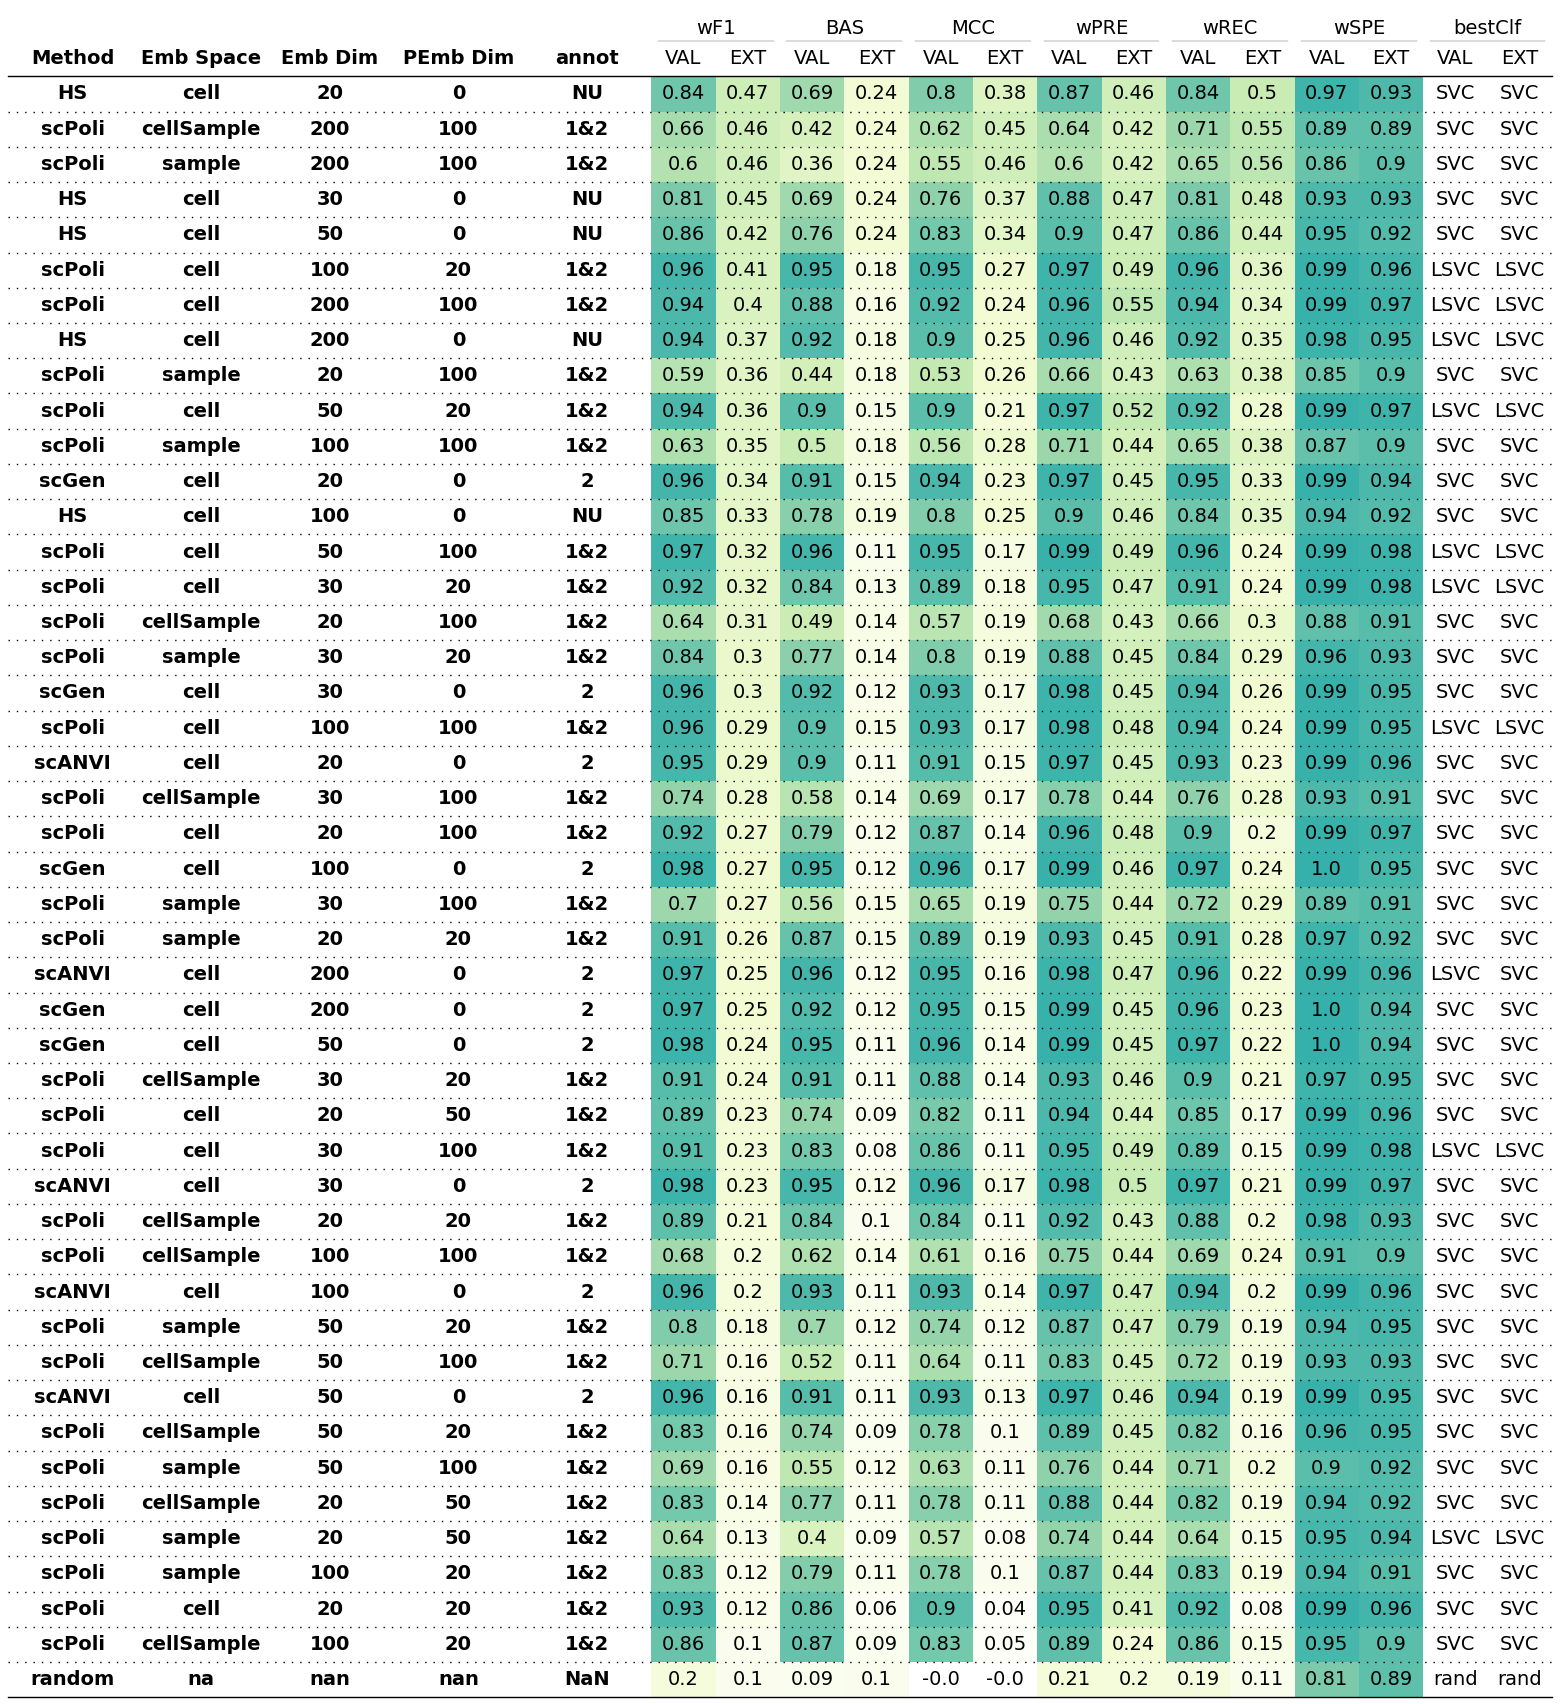

In [80]:
fig, ax = plt.subplots(figsize=(20, 22))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)

In [ ]:
# fig.savefig(here(f"03_downstream_analysis/09_patient_classifier/Classifiers/results_CT_studies/patient_classifier_scen2_3_metric_table.pdf"), dpi=400, bbox_inches='tight')

**VALIDATION**

In [82]:
aggr_metric_df_bestClf.query("integration_method == 'scPoli'").sort_values(['VALIDATION_F1'], ascending=False).iloc[0,:]

integration_method            scPoli
embedded_space                  cell
n_embedded                        50
n_Patient_embedded               100
batchKeys                  chemistry
annotation                  Level1n2
VALIDATION_F1                  0.971
EXTERNAL_F1                    0.325
VALIDATION_BAS                 0.962
EXTERNAL_BAS                   0.109
VALIDATION_MCC                 0.948
EXTERNAL_MCC                   0.172
VALIDATION_bestCLF         LinearSVC
EXTERNAL_bestCLF           LinearSVC
VALIDATION_WPrecision       0.985748
VALIDATION_WRecall          0.958333
VALIDATION_WSpecificity     0.994208
EXTERNAL_WPrecision         0.491694
EXTERNAL_WRecall            0.244186
EXTERNAL_WSpecificity       0.978047
Name: comb013, dtype: object

**EXTERNAL**

In [83]:
aggr_metric_df_bestClf.query("integration_method == 'scPoli'").sort_values(['EXTERNAL_F1'], ascending=False).iloc[1,:]

integration_method             scPoli
embedded_space             cellSample
n_embedded                        200
n_Patient_embedded                100
batchKeys                   chemistry
annotation                   Level1n2
VALIDATION_F1                   0.657
EXTERNAL_F1                     0.456
VALIDATION_BAS                  0.416
EXTERNAL_BAS                    0.235
VALIDATION_MCC                  0.625
EXTERNAL_MCC                    0.448
VALIDATION_bestCLF                SVC
EXTERNAL_bestCLF                  SVC
VALIDATION_WPrecision        0.641863
VALIDATION_WRecall           0.708333
VALIDATION_WSpecificity      0.890606
EXTERNAL_WPrecision           0.42133
EXTERNAL_WRecall             0.546512
EXTERNAL_WSpecificity        0.893436
Name: comb002, dtype: object